# Introduction

Hello there! In this project, we will try to predict a very imbalanced dataset - Credit Cards Frauds. As it is said in the description of the dataset, the features are transformed by a PCA (Principal Component Analysis, a Dimensionality Reduction technique) and have their names hidden for privacy reasons. We will try to explore some data and apply different classification models to come to the best solution. Let's start!

### Acknowledges
Special regards to the authors of these notebooks, which helped me a lot to write this script!

- https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets 

### Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

# Reading Data

In [2]:
data = pd.read_csv('../input/creditcardfraud/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.shape

(284807, 31)

Given that the dataset is extremely imbalanced, we will use StatifiedShuffleSplit to split the train and test sets with similar proportions of our target class.

In [4]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data['Class']):
    df_train = data.loc[train_index]
    df_test = data.loc[test_index]

print(df_train.shape)
print(df_test.shape)

(227845, 31)
(56962, 31)


In [5]:
print("Train Set Class column:")
print(df_train.Class.value_counts(normalize=True))

print("\nTest Set Class column:")
print(df_test.Class.value_counts(normalize=True))

Train Set Class column:
0    0.998271
1    0.001729
Name: Class, dtype: float64

Test Set Class column:
0    0.99828
1    0.00172
Name: Class, dtype: float64


Now that we have split our dataset, let's forget about Test Set and focus on our Training Set. Let's explore its data!

# Exploratory Data Analysis (EDA)

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227845 entries, 265518 to 17677
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    227845 non-null  float64
 1   V1      227845 non-null  float64
 2   V2      227845 non-null  float64
 3   V3      227845 non-null  float64
 4   V4      227845 non-null  float64
 5   V5      227845 non-null  float64
 6   V6      227845 non-null  float64
 7   V7      227845 non-null  float64
 8   V8      227845 non-null  float64
 9   V9      227845 non-null  float64
 10  V10     227845 non-null  float64
 11  V11     227845 non-null  float64
 12  V12     227845 non-null  float64
 13  V13     227845 non-null  float64
 14  V14     227845 non-null  float64
 15  V15     227845 non-null  float64
 16  V16     227845 non-null  float64
 17  V17     227845 non-null  float64
 18  V18     227845 non-null  float64
 19  V19     227845 non-null  float64
 20  V20     227845 non-null  float64
 21  V21   

In [7]:
df_train.columns[df_train.isnull().any()]

Index([], dtype='object')

As we can see, we don't have any columns with null values, and also every one of them is numerical. As I said earlier, the columns were scaled and transformed by a PCA. But I was lying... not all of them! The columns `Time` and `Amount` aren't scaled. Let's explore them to scale in the best possible way.

In [8]:
df_train[["Time", "Amount", "Class"]].describe()

,Time,Amount,Class
count,227845.000000,227845.000000,227845.000000
mean,94885.093704,88.176298,0.001729
std,47488.415034,250.722602,0.041548
min,0.000000,0.000000,0.000000
25%,54228.000000,5.640000,0.000000
50%,84805.000000,22.000000,0.000000
75%,139364.000000,77.490000,0.000000
max,172792.000000,25691.160000,1.000000


In [9]:
df_train.Time.nunique()

113920

In [10]:
# Setting some parameters to plot better graphs
custom_params = {"axes.spines.right": False, 
                 "axes.spines.top": False,  
                 "font.family": "arial", 
                 "figure.figsize": (18, 6)}
sns.set_theme(style="ticks", rc=custom_params)

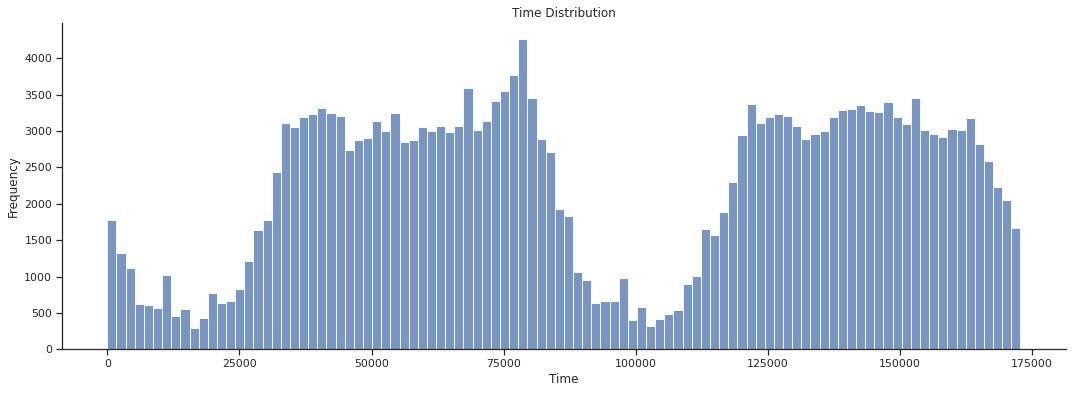

In [11]:
g = sns.histplot(df_train.Time, bins=100, label="Time", )
g.set_xlabel("Time")
g.set_ylabel("Frequency")
g.set_title("Time Distribution")
plt.show()

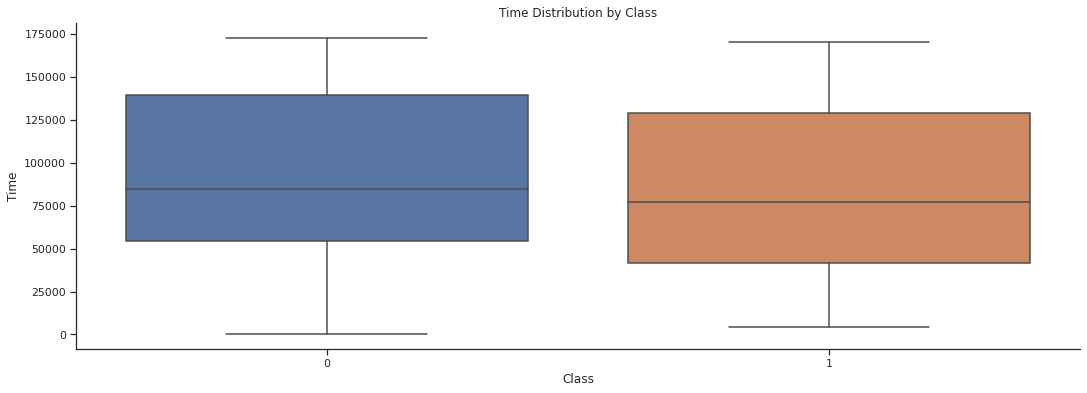

In [12]:
g = sns.boxplot(x="Class", y="Time", data=df_train)
g.set_title("Time Distribution by Class")
plt.show()

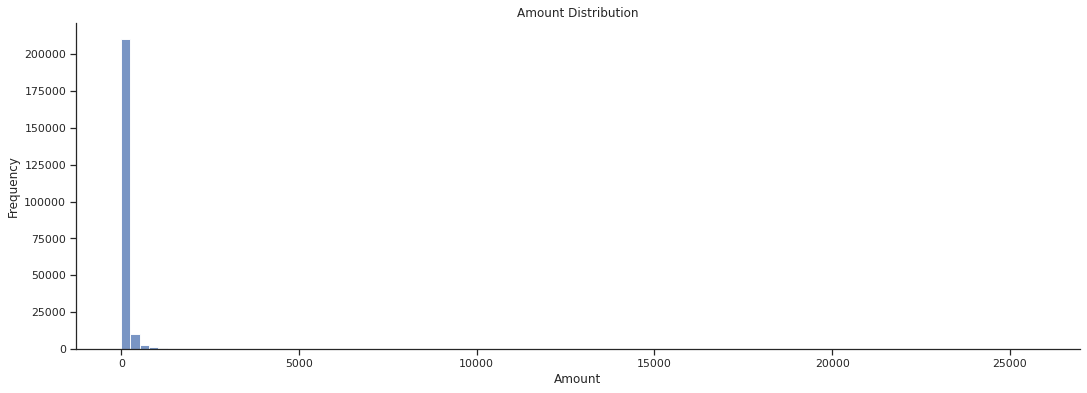

In [13]:
g = sns.histplot(df_train.Amount, bins=100, label="Amount")
g.set_ylabel("Frequency")
g.set_title("Amount Distribution")
plt.show()

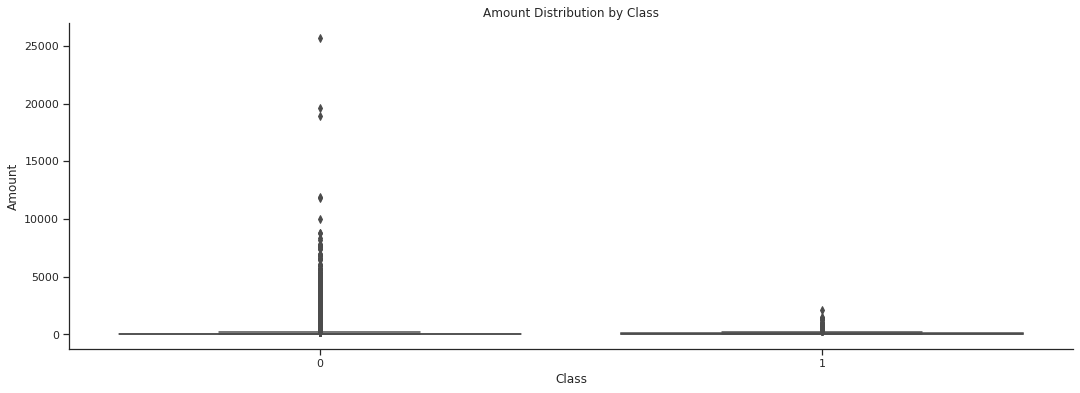

In [14]:
g = sns.boxplot(x="Class", y="Amount", data=df_train)
g.set_title("Amount Distribution by Class")
plt.show()

Wow, how many outliers! We can remove them, but we could remove rows with Class==1 (which we saw earlier that they are pretty rare and important). Another way is to use a scaling technique not very sensible to outliers, A.K.A RobustScaler! Check this amazing article by Jeff Hale about different scaling, normalizing, and standardizing techniques: https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02

In [15]:
from sklearn.preprocessing import RobustScaler

rob_amount = RobustScaler()
rob_time = RobustScaler()
df_train['scaled_amount'] = rob_amount.fit_transform(df_train['Amount'].values.reshape(-1,1))
df_train['scaled_time'] = rob_time.fit_transform(df_train['Time'].values.reshape(-1,1))

df_train.drop(['Time','Amount'], axis=1, inplace=True)

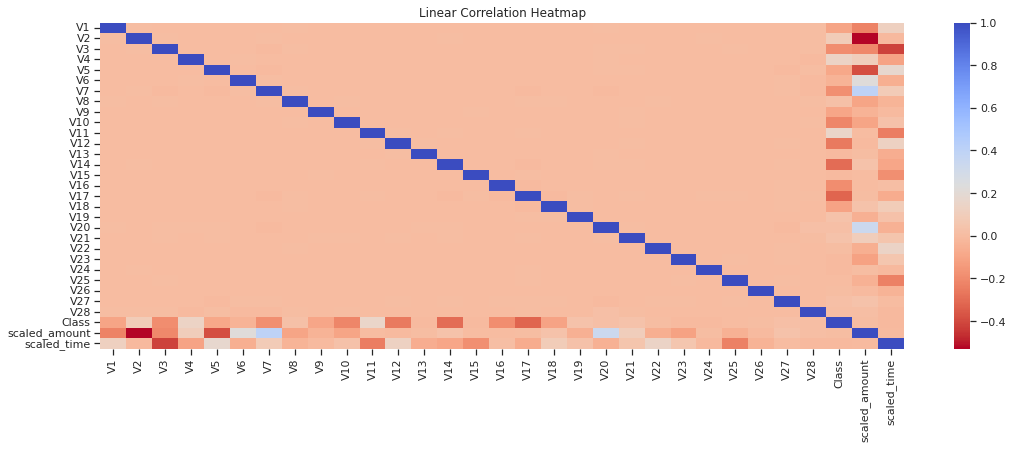

In [16]:
corr = df_train.corr()
g = sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap='coolwarm_r',
            
            )
g.set_title("Linear Correlation Heatmap")
plt.show()

As we can see, `V2` and `V5` are very negatively correlated with `scaled_amount`, and `V3` with `scaled_time`.

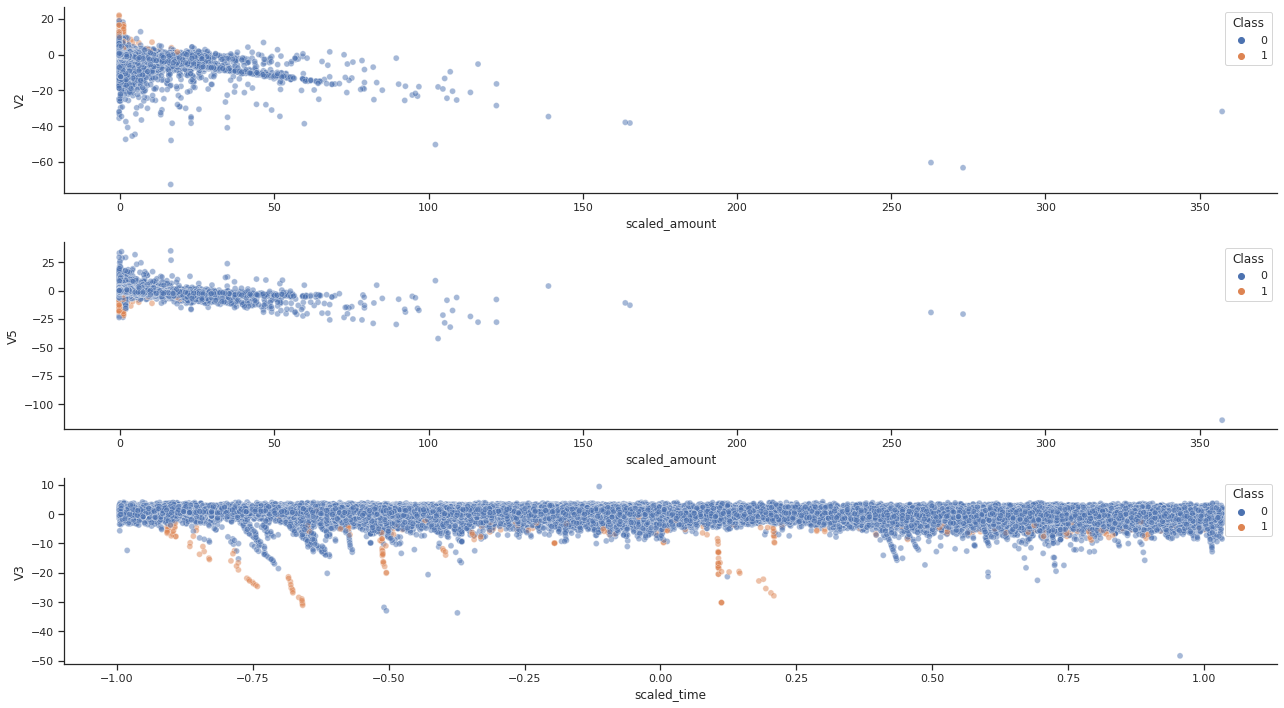

In [17]:
fig, ax = plt.subplots(3, 1, figsize=(18,10))
g0 = sns.scatterplot(x="scaled_amount", y="V2", data=df_train, ax=ax[0], hue="Class", alpha=0.5)
g1 = sns.scatterplot(x="scaled_amount", y="V5", data=df_train, ax=ax[1], hue="Class", alpha=0.5)
g2 = sns.scatterplot(x="scaled_time", y="V3", data=df_train, ax=ax[2], hue="Class", alpha=0.5)
plt.tight_layout()
plt.show()

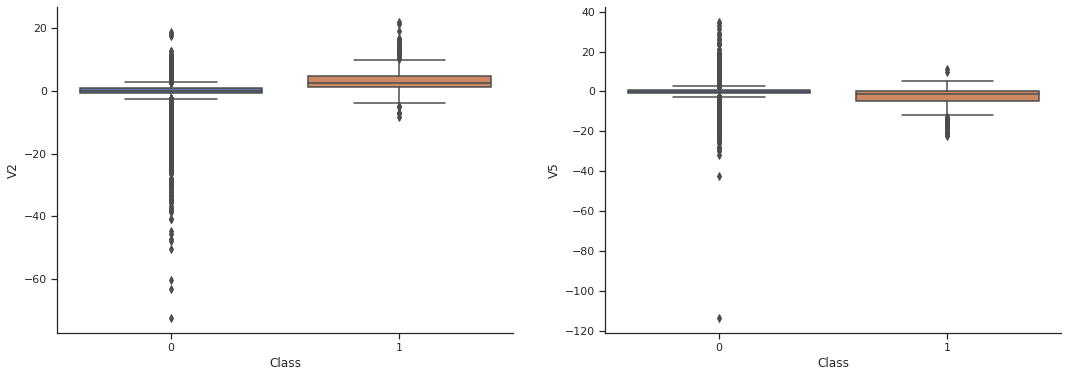

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(18,6))

sns.boxplot(x="Class", y="V2", data=df_train, ax=ax[0])
sns.boxplot(x="Class", y="V5", data=df_train, ax=ax[1])
plt.show()

# Training ML Models

In [19]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df_train, df_train['Class']):
    df_train_ml = data.loc[train_index]
    df_valid = data.loc[test_index]

X_train = df_train_ml.drop(['Class'], axis=1)
X_valid = df_valid.drop(['Class'], axis=1)
y_train = df_train_ml['Class']
y_valid = df_valid['Class']

Now we will use RandomizedSearchCV to find the best params for our model. Given that our dataset is imbalanced, we will use a technique called Oversampling, using the SMOTE algorithm to create a dataset with synthetic positive instances.

In [20]:
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.base import clone
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix
import xgboost as xgb

In [21]:
params_grid = {
                "n_estimators": [100, 500, 1000],
                "max_depth": [2, 5, 10],
                "learning_rate": [1e-4, 1e-3, 1e-2, 1e-1, 0.5, 1.0],
                "gamma": stats.reciprocal(0.001, 0.1),
                "subsample": np.arange(0.1, 1.0, 0.1),
                "colsample_bytree": np.arange(0.1, 1.0, 0.1),
                "scale_pos_weight": [5, 10, 20, 50, 100],
                "n_jobs": [-1],
                "use_label_encoder": [False],
                "random_state": [42]
        }

fit_params = {
                "early_stopping_rounds": 5,
                "eval_metric":["auc"],
                "eval_set": [(X_valid, y_valid)],
                "verbose":0
        }

In [22]:
xgb_clf = xgb.XGBClassifier()
rand_grid = RandomizedSearchCV(xgb_clf, 
                               params_grid, 
                               n_iter=10, 
                               cv=5, 
                               scoring="recall", 
                               random_state=42,
                               verbose=1,
                               n_jobs=-1)
pipe = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_grid)
rand_grid.fit(X_train, y_train, **fit_params)
preds = rand_grid.predict(X_valid)

f1 = f1_score(y_valid, preds)
precision = precision_score(y_valid, preds)
recall = recall_score(y_valid, preds)
print("F1 Score: %.3f" %f1)
print("Precision: %.3f" %precision)
print("Recall: %.3f" %recall)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  4.1min finished


F1 Score: 0.802
Precision: 0.798
Recall: 0.807


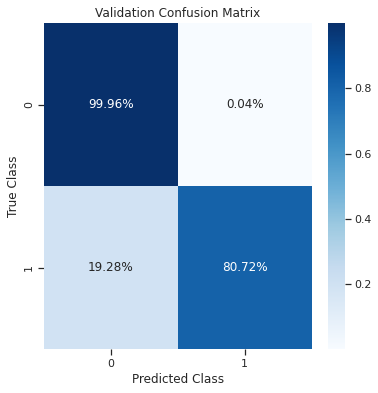

In [23]:
cm = confusion_matrix(y_valid, preds, normalize='true', labels=[0,1])
plt.figure(figsize=(6,6))
g = sns.heatmap(cm, annot=True, fmt=".2%", cmap="Blues")
g.set_title("Validation Confusion Matrix")
g.set_xlabel("Predicted Class")
g.set_ylabel("True Class")
plt.show()

## Training On Full Data

In [24]:
best_xgb = rand_grid.best_estimator_

In [25]:
best_xgb

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7000000000000001,
              enable_categorical=False, gamma=0.09256818992066876, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.0001, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              predictor='auto', random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=20, subsample=0.7000000000000001,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [26]:
X = df_train.drop(['Class'], axis=1)
y = df_train['Class']

smote = SMOTE(sampling_strategy='minority')
X_res, y_res = smote.fit_resample(X, y)
best_xgb.fit(X_res, y_res)

[17:38:47] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7000000000000001,
              enable_categorical=False, gamma=0.09256818992066876, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.0001, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              predictor='auto', random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=20, subsample=0.7000000000000001,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

# Model Explainability

In [27]:
!pip install shap

In [28]:
import shap 

explainer = shap.Explainer(best_xgb)

shap_values = explainer(X, check_additivity=False)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


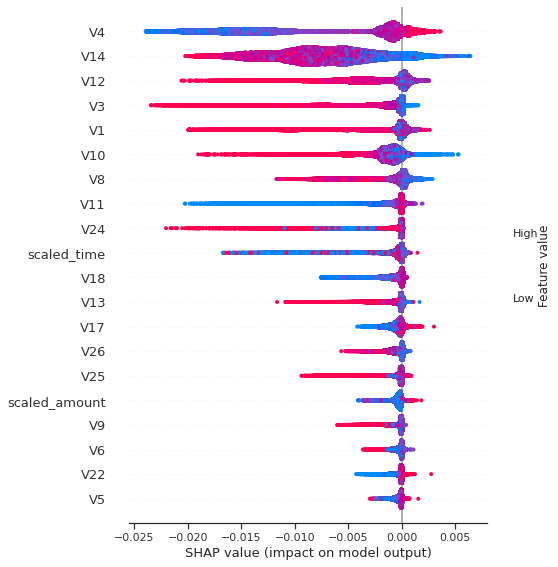

In [29]:
shap.summary_plot(shap_values, X)

# Predicting Test Labels

In [30]:
df_test['scaled_amount'] = rob_amount.transform(df_test['Amount'].values.reshape(-1,1))
df_test['scaled_time'] = rob_time.transform(df_test['Time'].values.reshape(-1,1))

df_test.drop(['Time','Amount'], axis=1, inplace=True)

In [31]:
X_test = df_test.drop(["Class"], axis=1)
y_test = df_test["Class"]

In [32]:
test_preds = best_xgb.predict(X_test)
y_test.index = range(len(y_test))

y_test_1 = y_test[y_test == 1]
test_preds_1 = test_preds[y_test_1.index]

y_test_0 = y_test[y_test == 0]
test_preds_0 = test_preds[y_test_0.index]

In [33]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, test_preds)
acc_1 = accuracy_score(y_test_1, test_preds_1)
acc_0 = accuracy_score(y_test_0, test_preds_0)

print("Total Accuracy: %.1f%%" %(acc*100))
print("Fraud Accuracy: %.1f%%" %(acc_1*100))
print("Non-Fraud Accuracy: %.1f%%" %(acc_0*100))

Total Accuracy: 94.6%
Fraud Accuracy: 92.9%
Non-Fraud Accuracy: 94.6%


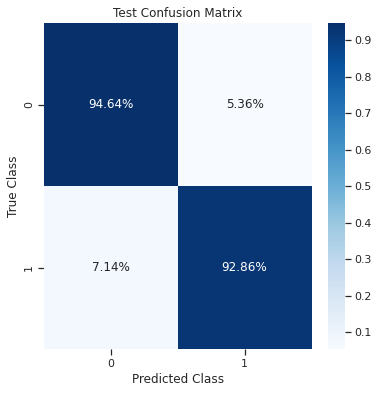

In [34]:
cm = confusion_matrix(y_test, test_preds, normalize='true', labels=[0,1])
plt.figure(figsize=(6,6))
g = sns.heatmap(cm, annot=True, fmt=".2%", cmap="Blues")
g.set_title("Test Confusion Matrix")
g.set_xlabel("Predicted Class")
g.set_ylabel("True Class")
plt.show()

In [35]:
output = pd.DataFrame({"Id": y_test.index, "Class": test_preds})
output.to_csv("output.csv", index=False)

If you come this far, thank you! I hope I could help you in some way with my solution. Please let me know how can I improve it in the comments :)